<a href="https://colab.research.google.com/github/kuozheng10/FLASK_HEROKU/blob/master/ML_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [0]:
 train = pd.read_csv('train.csv')
 test = pd.read_csv('test.csv')

In [0]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [0]:
Y_label = train.Survived
#train.drop('Survived',1,inplace=True)


In [0]:
print(train)
print(test)
print(Y_label)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

In [79]:
x_train = train.append(test)
print(x_train)

     PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0              1       0.0       3  ...    7.2500   NaN         S
1              2       1.0       1  ...   71.2833   C85         C
2              3       1.0       3  ...    7.9250   NaN         S
3              4       1.0       1  ...   53.1000  C123         S
4              5       0.0       3  ...    8.0500   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305       NaN       3  ...    8.0500   NaN         S
414         1306       NaN       1  ...  108.9000  C105         C
415         1307       NaN       3  ...    7.2500   NaN         S
416         1308       NaN       3  ...    8.0500   NaN         S
417         1309       NaN       3  ...   22.3583   NaN         C

[1309 rows x 12 columns]


In [0]:
print(x_train.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [0]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
x_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
x_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


船上乘客各年紀層的男女比例

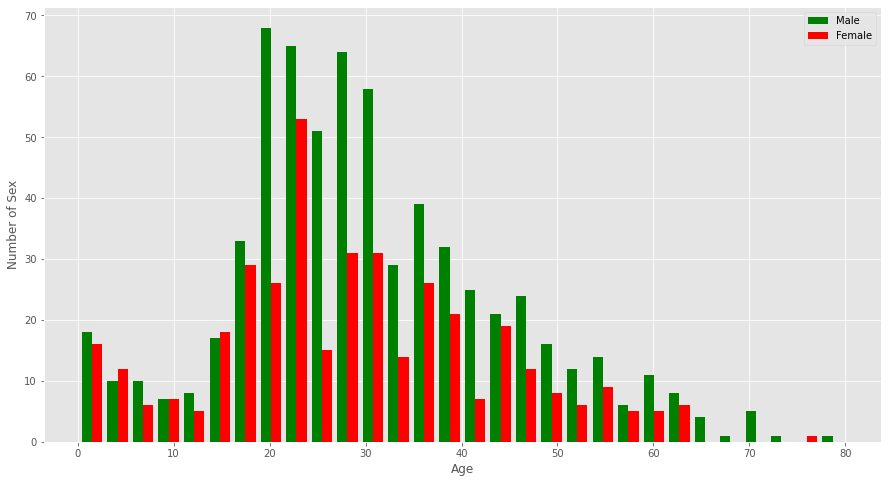

In [8]:
figure = plt.figure(figsize=(15,8))
plt.hist([x_train[x_train['Sex']=='male']['Age'],x_train[x_train['Sex']=='female']['Age']],stacked=False,color=['g','r'],bins = 30, label=['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Number of Sex')
plt.legend()

In [9]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


以人數來看不同性別的悻存率

In [0]:
print(train[['Sex','Survived']].groupby(by='Sex',as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


以圖型化方式顯示男性與女性存活數與死亡數

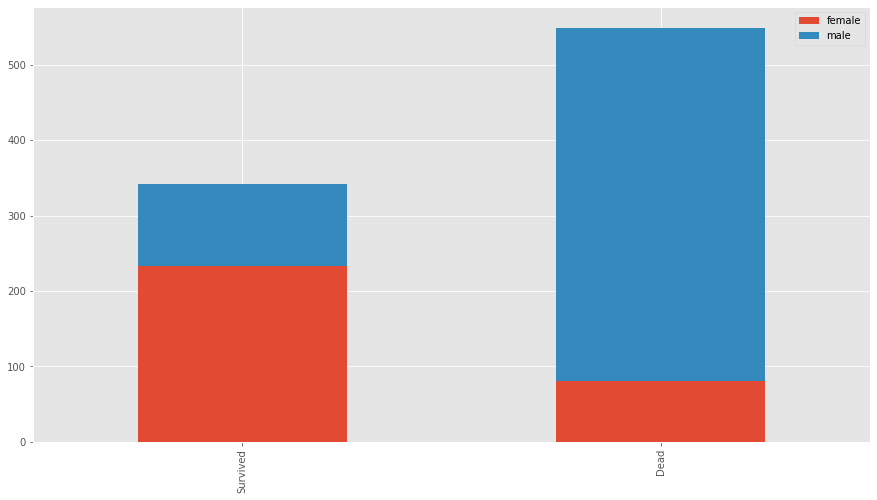

In [10]:
survived_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_sex = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

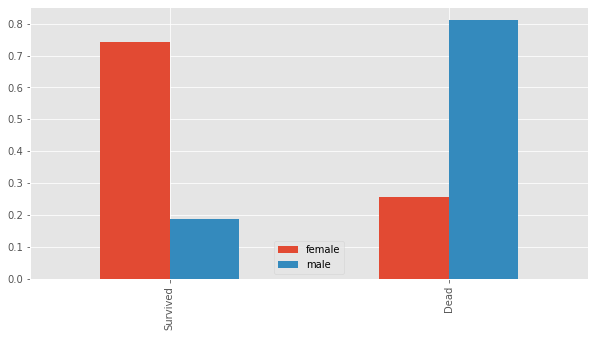

In [0]:
total_sex = train['Sex'].value_counts()
p_survived_sex = train[train['Survived']==1]['Sex'].value_counts()/total_sex
p_dead_sex = train[train['Survived']==0]['Sex'].value_counts()/total_sex
df = pd.DataFrame([p_survived_sex,p_dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False,figsize=(10,5))

In [0]:
print( train[train['Survived']==1]['Name'].count())

342


In [0]:
x_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

姓名與稱呼

In [0]:
for title in ['Mr.','Sir.','Dr.','Major.','Master.']:
  num = x_train[(x_train['Name'].str.contains(title))]['Name'].count()
  age = x_train[(x_train['Name'].str.contains(title))]['Age'].mean()

  print('{}->{} males, Age average is {}'.format(title, num, age))
print('--------------------------------------------------------------')

Mr.->959 males, Age average is 33.32208994708995
Sir.->3 males, Age average is 35.5
Dr.->17 males, Age average is 37.266666666666666
Major.->2 males, Age average is 48.5
Master.->61 males, Age average is 5.482641509433963
--------------------------------------------------------------


In [0]:
for title in ['Ms.','Miss.','Mrs.','Lady.']:
  num = x_train[(x_train['Name'].str.contains(title))]['Name'].count()
  age = x_train[(x_train['Name'].str.contains(title))]['Age'].mean()

  print('{}-> {} females, Age average is {} '.format(title,num,age))

Ms.-> 2 females, Age average is 28.0 
Miss.-> 260 females, Age average is 21.774238095238097 
Mrs.-> 201 females, Age average is 36.804597701149426 
Lady.-> 1 females, Age average is 48.0 


In [0]:
print(train)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [0]:
x_train['Family'] = x_train['SibSp'] + x_train['Parch']
x_train.drop('SibSp',1,inplace=True)
x_train.drop('Parch',1,inplace=True)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Family       1309 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


Age, Family, Fare欄位值有缺

In [0]:
x_train[x_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
5,6,0.0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.0000,NaN,S,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,2649,7.2250,NaN,C,0
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,2631,7.2250,NaN,C,0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,330959,7.8792,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,334915,7.7208,NaN,Q,0
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,365237,7.7500,NaN,Q,0
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,359309,8.0500,NaN,S,0


In [0]:
for title in ['Mr\.','Sir\.','Dr\.','Major\.','Master\.']:
  num = x_train[(x_train['Name'].str.contains(title))]['Name'].count()
  age_mean = round(x_train[(x_train['Name'].str.contains(title))]['Age'].mean(),1)
  age_median = x_train[(x_train['Name'].str.contains(title))]['Age'].median()
  num_survived = x_train[(x_train['Survived']==1) & (x_train['Name'].str.contains(title))]['Name'].count()
  num_dead = x_train[(x_train['Survived']==0) & (x_train['Name'].str.contains(title))]['Name'].count()
  num_total = num_survived + num_dead
  p_survived = num_survived/num_total
  print('{} -> {} males,Age average is {}, median is {}, {} survived, {} dead, {:.2%}  survived'.format(title,num,age_mean, age_median, num_survived, num_dead, p_survived))

Mr\. -> 757 males,Age average is 32.3, median is 29.0, 81 survived, 436 dead, 15.67%  survived
Sir\. -> 1 males,Age average is 49.0, median is 49.0, 1 survived, 0 dead, 100.00%  survived
Dr\. -> 8 males,Age average is 43.6, median is 49.0, 3 survived, 4 dead, 42.86%  survived
Major\. -> 2 males,Age average is 48.5, median is 48.5, 1 survived, 1 dead, 50.00%  survived
Master\. -> 61 males,Age average is 5.5, median is 4.0, 23 survived, 17 dead, 57.50%  survived


In [0]:
for title in ['Ms\.','Miss\.','Mrs\.','Lady\.']:
  num = x_train[(x_train['Name'].str.contains(title))]['Name'].count()
  age_mean = x_train[(x_train['Name'].str.contains(title))]['Age'].mean()
  age_median = x_train[(x_train['Name'].str.contains(title))]['Age'].median()
  num_survived = x_train[(x_train['Survived']==1) & (x_train['Name'].str.contains(title))]['Name'].count()
  num_dead = x_train[(x_train['Survived']==0) & (x_train['Name'].str.contains(title))]['Name'].count()
  num_total = num_survived + num_dead
  p_survived = num_survived / num_total

  print('{} -> {} females, Age average is {}, median is {}, {} survived, {} dead, {:.2%} survived'.format(title,num,age_mean,age_median,num_survived,num_dead,p_survived))

Ms\. -> 2 females, Age average is 28.0, median is 28.0, 1 survived, 0 dead, 100.00% survived
Miss\. -> 260 females, Age average is 21.774238095238097, median is 22.0, 127 survived, 55 dead, 69.78% survived
Mrs\. -> 197 females, Age average is 36.99411764705882, median is 35.5, 99 survived, 26 dead, 79.20% survived
Lady\. -> 1 females, Age average is 48.0, median is 48.0, 1 survived, 0 dead, 100.00% survived


將Age欄位用中位數來取代

In [0]:
mask = (x_train['Age'].isnull()) & ((x_train['Name'].str.contains('Ms\.')) | (x_train['Name'].str.contains('Miss\.')) | (x_train['Name'].str.contains('Mrs\.')))
mask2 = ((x_train['Name'].str.contains('Ms\.')) | (x_train['Name'].str.contains('Miss\.')) | (x_train['Name'].str.contains('Mrs\.')))
x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].mean())

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1124 non-null   float64
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Family       1309 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [0]:
mask = (x_train['Age'].isnull()) & ((x_train['Name'].str.contains('Mr\.')) | (x_train['Name'].str.contains('Sir\.')) | (x_train['Name'].str.contains('Major')) )
mask2 = ((x_train['Name'].str.contains('Mr\.')) | (x_train['Name'].str.contains('Sir\.')) | (x_train['Name'].str.contains('Major')) )
x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].median())

In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1300 non-null   float64
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Family       1309 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [0]:
x_train[x_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,2661,15.2458,NaN,C,2
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,CA. 2343,69.5500,NaN,S,10
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,4133,25.4667,NaN,S,4
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,2661,15.2458,NaN,C,2
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,112379,39.6000,NaN,C,0
244,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,W./C. 6607,23.4500,NaN,S,3
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,2622,7.2292,NaN,C,0
344,1236,NaN,3,"van Billiard, Master. James William",male,NaN,A/5. 851,14.5000,NaN,S,2
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,2668,22.3583,NaN,C,2


In [0]:
mask = (x_train['Age'].isnull()) & (x_train['Name'].str.contains('Master\.'))
mask2 = (x_train['Name'].str.contains('Master\.'))
x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].median())

In [0]:
mask = (x_train['Age'].isnull()) & (x_train['Name'].str.contains('Dr\.'))
mask2 = (x_train['Name'].str.contains('Dr\.'))
x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].median())

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Family       1309 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


把處理Age的程式集中為一個function

In [0]:
def fill_Age():
  global x_train
  
  # Ms. or Miss. or Mrs.
  mask = (x_train['Age'].isnull()) & ((x_train['Name'].str.contains('Ms\.')) | (x_train['Name'].str.contains('Miss\.')) | (x_train['Name'].str.contains('Mrs\.')))
  mask2 = ((x_train['Name'].str.contains('Ms\.')) | (x_train['Name'].str.contains('Miss\.')) | (x_train['Name'].str.contains('Mrs\.')))
  x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].mean()) 
  
  # Mr. or Sir. or Major
  mask = (x_train['Age'].isnull()) & ((x_train['Name'].str.contains('Mr\.')) | (x_train['Name'].str.contains('Sir\.')) | (x_train['Name'].str.contains('Major')) )
  mask2 = ((x_train['Name'].str.contains('Mr\.')) | (x_train['Name'].str.contains('Sir\.')) | (x_train['Name'].str.contains('Major')) )
  x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].median())
  
  # Master.
  mask = (x_train['Age'].isnull()) & (x_train['Name'].str.contains('Master\.'))
  mask2 = (x_train['Name'].str.contains('Master\.'))
  x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].median())
  
  # Dr.
  mask = (x_train['Age'].isnull()) & (x_train['Name'].str.contains('Dr\.'))
  mask2 = (x_train['Name'].str.contains('Dr\.'))
  x_train.loc[mask,'Age'] = x_train.loc[mask,'Age'].fillna(x_train.loc[mask2,'Age'].median())

In [0]:
fill_Age()

處理船票價格
直接用中位數填滿缺失的船票價格

In [50]:
x_train[x_train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family


In [0]:
def fill_Fare():
  x_train['Fare'].fillna(x_train['Fare'].median(),inplace=True)

In [0]:
fill_Fare()
#x_train[x_train['PassengerId']==1044]
#x_train['Fare']

In [0]:
def fill_Embarked():
  x_train['Embarked'].fillna('C',inplace=True)

In [0]:
fill_Embarked()

In [88]:
x_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1309
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [61]:
x_train[(x_train['Cabin'].isnull()) & (x_train['Survived'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,892,NaN,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,0
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,347086,7.7750,NaN,S,0
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,A.5. 3236,8.0500,NaN,S,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,359309,8.0500,NaN,S,0


死亡->Cabin='G'

存活->Cabin='B'

Survived=NA & Pclass=1 ->Cabin='B'

Survived=NA & Pclass=2 ->Cabin='F'

Survived=NA & Pclass=3 ->Cabin='G'

In [0]:
def fill_Cabin():
  mask = (x_train['Survived']==0) & (x_train['Cabin'].isnull())
  x_train.loc[mask,'Cabin'] = 'G'

  mask = (x_train['Survived']==1) & (x_train['Cabin'].isnull())
  x_train.loc[mask,'Cabin'] = 'B'

  mask = (x_train['Survived'].isnull()) & (x_train['Cabin'].isnull()) & (x_train['Pclass']==1)
  x_train.loc[mask,'Cabin'] = 'B'

  mask = (x_train['Survived'].isnull()) & (x_train['Cabin'].isnull()) & (x_train['Pclass']==2)
  x_train.loc[mask,'Cabin'] = 'F'

  mask = (x_train['Survived'].isnull()) & (x_train['Cabin'].isnull()) & (x_train['Pclass']==3)
  x_train.loc[mask,'Cabin'] = 'G'

In [0]:
fill_Cabin()

In [94]:
x_train['Ticket'].str.extract('([a-zA-Z]*)',expand=False).str.upper()

0          A
1         PC
2       STON
3           
4           
       ...  
413        A
414       PC
415    SOTON
416         
417         
Name: Ticket, Length: 1309, dtype: object

若Ticket編號為字母加上編號 -> 則取字母部份

若Ticket編號只有數字 ->則取空字串

In [0]:
def fill_Ticket():
  global x_train
  x_train['Ticket'] = x_train['Ticket'].str.extract('([a-zA-Z]*)',expand=False).str.upper()

In [0]:
fill_Ticket()

In [98]:
x_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,21,188,3
top,"Kelly, Mr. James",male,,G,S
freq,2,843,957,695,914


In [99]:
print(x_train['Ticket'].unique())

['A' 'PC' 'STON' '' 'PP' 'C' 'SC' 'S' 'CA' 'SO' 'W' 'SOTON' 'FA' 'LINE'
 'F' 'SW' 'SCO' 'P' 'WE' 'AQ' 'LP']


新增Title欄位:將Name欄位中的稱謂，單獨取出新增為Title欄位，若無任何稱謂，則取年紀來判斷，給予一個合適的稱謂

In [0]:
def fill_Title():
  global x_train
  for typeName in ['Ms\.','Miss\.','Mr\.','Sir\.','Major','Dr\.','Master\.','Mme\.']:
    mask = (x_train['Name'].str.contains(typeName))
    replaceTitle = typeName.replace('\\','')
    if(typeName=='Mme\.'):
      replaceTitle = 'Ms.'
    x_train.loc[mask,'Title'] = replaceTitle #add a new column ('Title)
    
  mask = (x_train['Title'].isnull()) & (x_train['Age']<14) & (x_train['Sex']=='male')
  x_train.loc[mask,'Title'] = 'Master.'

  mask = (x_train['Title'].isnull()) & (x_train['Age']>13) & (x_train['Sex']=='male')
  x_train.loc[mask,'Title'] = 'Mr.'

  mask = (x_train['Title'].isnull()) & (x_train['Sex']=='female')
  x_train.loc[mask,'Title'] = 'Miss.'

In [0]:
fill_Title()

In [118]:
x_train['Title'].unique()

array(['Mr.', 'Miss.', 'Master.', 'Dr.', 'Ms.', 'Major', 'Sir.'],
      dtype=object)

In [122]:
x_train.describe(include='O')

,Sex,Ticket,Cabin,Embarked,Title
count,1309,1309,1309,1309,1309
unique,2,21,188,3,7
top,male,,G,S,Mr.
freq,843,957,695,914,772


In [0]:
x_train.drop('Name',axis=1,inplace=True)

最後要將所有非"數值"Categories型態欄位進行

#One-Hot Encoding

才能送給機器進行學習，這些屬於類別型態的欄位有:Sex、Pclass、Ticket、Cabin、Embarked、Title